In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as plt
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
inputFile = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
data = pd.read_csv(inputFile,sep='\t',low_memory=False)

In [3]:
data_processed = data[['Peptide'] + [c for c in data.columns if 'intensity_for_peptide_variant' in c]]

In [4]:
data_processed.replace(0.0,np.nan, inplace = True)

/tmp/ipykernel_99/24937952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed.replace(0.0,np.nan, inplace = True)


In [5]:
data_processed = data_processed.set_index("Peptide")

In [6]:
data_processed = data_processed.T

In [7]:
data_processed.index = data_processed.index.map(lambda x:'.'.join(x.split('.')[:2]))

In [8]:
def create_label(x):
    if "#Healthy" in x:
        return 1
    elif "#Non-severe-COVID-19" in x:
        return 2
    elif "#Severe-COVID-19" in x:
        return 3
    elif "#Symptomatic-non-COVID-19" in x:
        return 4
    else:
        return 0
data_processed["label"]=data_processed.index.map(lambda x: create_label(x))

In [9]:
data_processed = data_processed[data_processed['label']!=0]

In [10]:
#Filter Data based on NaN for each label
per_label_count = data_processed.groupby('label').count()
filterCondition = (per_label_count >= 18).all()
filter_per_label = per_label_count.loc[:, filterCondition]
filter_column = list(filter_per_label.columns) +['label']
filter_data =  data_processed[filter_column]

In [11]:
for column in tqdm(filter_data):
    if column != "label":
        filter_data[column] = filter_data.groupby("label")[column].transform(lambda x: x.fillna(x.mean()))

  0%|          | 0/90 [00:00<?, ?it/s]/tmp/ipykernel_99/3972711595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data[column] = filter_data.groupby("label")[column].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_99/3972711595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data[column] = filter_data.groupby("label")[column].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_99/3972711595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [12]:
##filter_data.to_csv("filterd_data.tsv", sep="\t")

In [13]:
filter_data

Peptide                                            R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Healthy.HC1                                                                           0.101284      
_dyn_#Healthy.HC10                                                                          0.211214      
_dyn_#Healthy.HC12                                                                          0.094757      
_dyn_#Healthy.HC13                                                                          0.128179      
_dyn_#Healthy.HC17                                                                          0.104670      
...                                                                                              ...      
_dyn_#Symptomatic-non-COVID-19.JBDZ6                                                        0.031197      
_dyn_#Symptomatic-non-COVID-19.JBDZ7                                                        0.063094      
_dyn_#Symptomatic-non-COVID-19.JBDZ8                                                        0.067680      
_dyn_#Symptomatic-non-COVID-19.JBDZ9                                                        0.095905      
_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz                                           0.011803      

Peptide                                            R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Healthy.HC1                                                                           1.352256                
_dyn_#Healthy.HC10                                                                          0.366582                
_dyn_#Healthy.HC12                                                                          0.174988                
_dyn_#Healthy.HC13                                                                          0.282839                
_dyn_#Healthy.HC17                                                                          0.312750                
...                                                                                              ...                
_dyn_#Symptomatic-non-COVID-19.JBDZ6                                                        0.218505                
_dyn_#Symptomatic-non-COVID-19.JBDZ7                                                        0.168100                
_dyn_#Symptomatic-non-COVID-19.JBDZ8                                                        0.249860                
_dyn_#Symptomatic-non-COVID-19.JBDZ9                                                        0.319936                
_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz                                           0.314668                

Peptide                                            K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L  \
_dyn_#Healthy.HC1                                                                           0.272530         
_dyn_#Healthy.HC10                                                                          0.296847         
_dyn_#Healthy.HC12                                                                          0.147994         
_dyn_#Healthy.HC13                                                                          0.277178         
_dyn_#Healthy.HC17                                                                          0.932067         
...                                                                                              ...         
_dyn_#Symptomatic-non-COVID-19.JBDZ6                                                        0.113378         
_dyn_#Symptomatic-non-COVID-19.JBDZ7                                                        0.156081         
_dyn_#Symptomatic-non-COVID-19.JBDZ8                                                        0.257619         
_dyn_#Symptomatic-non-COVID-19.JBDZ9                                                        0.271392         
_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz                                           0.523605

In [14]:
# corr1 = filter_data.corr()

In [15]:
# cor_matrix = corr1.abs()

In [16]:
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [17]:
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [18]:
# data_processed_1 = filter_data.drop(filter_data.columns[to_drop], axis=1)

In [19]:
data_correlated = filter_data.corr()

In [20]:
data_correlated

Peptide                                             R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
Peptide                                                                                                    
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                           1.000000      
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                          -0.147077      
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                           0.210361      
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                     0.757234      
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                           0.314623      
...                                                                                               ...      
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                    -0.465838      
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                                                     0.458353      
K.[304.207]YLGEEY(V,-18.002)(K,304.207).A                                                   -0.049074      
K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A                                                   -0.013072      
label                                                                                       -0.028810      

Peptide                                             R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
Peptide                                                                                                              
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                          -0.147077                
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                           1.000000                
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                          -0.081191                
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                    -0.301039                
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                           0.224343                
...                                                                                               ...                
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                     0.363800                
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                                                    -0.005968                
K.[304.207]YLGEEY(V,-18.002)(K,304.207).A                                                    0.194494                
K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A                                                    0.257172                
label                                                                                       -0.136155                

Peptide                                             K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L  \
Peptide                                                                                                       
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                           0.210361         
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                          -0.081191         
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                           1.000000         
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                     0.270530         
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                           0.516228         
...                                                                                               ...         
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                     0.504976         
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                     

In [21]:
corr_matrix = data_correlated.abs()

In [22]:
corr_matrix

Peptide                                             R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
Peptide                                                                                                    
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                           1.000000      
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                           0.147077      
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                           0.210361      
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                     0.757234      
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                           0.314623      
...                                                                                               ...      
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                     0.465838      
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                                                     0.458353      
K.[304.207]YLGEEY(V,-18.002)(K,304.207).A                                                    0.049074      
K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A                                                    0.013072      
label                                                                                        0.028810      

Peptide                                             R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
Peptide                                                                                                              
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                           0.147077                
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                           1.000000                
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                           0.081191                
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                     0.301039                
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                           0.224343                
...                                                                                               ...                
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                     0.363800                
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                                                     0.005968                
K.[304.207]YLGEEY(V,-18.002)(K,304.207).A                                                    0.194494                
K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A                                                    0.257172                
label                                                                                        0.136155                

Peptide                                             K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L  \
Peptide                                                                                                       
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                           0.210361         
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                           0.081191         
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                           1.000000         
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                     0.270530         
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                           0.516228         
...                                                                                               ...         
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                     0.504976         
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                     

In [23]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

/tmp/ipykernel_99/1559577561.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [24]:
upper_tri

Peptide                                             R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
Peptide                                                                                                    
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                                NaN      
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                                NaN      
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                                NaN      
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                          NaN      
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                                NaN      
...                                                                                               ...      
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                          NaN      
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                                                          NaN      
K.[304.207]YLGEEY(V,-18.002)(K,304.207).A                                                         NaN      
K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A                                                         NaN      
label                                                                                             NaN      

Peptide                                             R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
Peptide                                                                                                              
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                           0.147077                
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                                NaN                
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                                NaN                
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                          NaN                
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                                NaN                
...                                                                                               ...                
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                          NaN                
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                                                          NaN                
K.[304.207]YLGEEY(V,-18.002)(K,304.207).A                                                         NaN                
K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A                                                         NaN                
label                                                                                             NaN                

Peptide                                             K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L  \
Peptide                                                                                                       
R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)...                                           0.210361         
R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF...                                           0.081191         
K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,30...                                                NaN         
R.[304.207]DDTV(C,58.003)LA(K,304.207).L                                                          NaN         
K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,30...                                                NaN         
...                                                                                               ...         
K.[304.207]YLGEE(Y,21.985)V(K,304.207).A                                                          NaN         
K.[304.207]YL(G,13.987)EEYV(K,304.207).A                     

In [25]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

In [26]:
# to_drop
len(to_drop)

5594

In [27]:
filter_data = filter_data.drop(columns=to_drop)

In [28]:
filter_data

Peptide                                            R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Healthy.HC1                                                                           0.101284      
_dyn_#Healthy.HC10                                                                          0.211214      
_dyn_#Healthy.HC12                                                                          0.094757      
_dyn_#Healthy.HC13                                                                          0.128179      
_dyn_#Healthy.HC17                                                                          0.104670      
...                                                                                              ...      
_dyn_#Symptomatic-non-COVID-19.JBDZ6                                                        0.031197      
_dyn_#Symptomatic-non-COVID-19.JBDZ7                                                        0.063094      
_dyn_#Symptomatic-non-COVID-19.JBDZ8                                                        0.067680      
_dyn_#Symptomatic-non-COVID-19.JBDZ9                                                        0.095905      
_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz                                           0.011803      

Peptide                                            R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Healthy.HC1                                                                           1.352256                
_dyn_#Healthy.HC10                                                                          0.366582                
_dyn_#Healthy.HC12                                                                          0.174988                
_dyn_#Healthy.HC13                                                                          0.282839                
_dyn_#Healthy.HC17                                                                          0.312750                
...                                                                                              ...                
_dyn_#Symptomatic-non-COVID-19.JBDZ6                                                        0.218505                
_dyn_#Symptomatic-non-COVID-19.JBDZ7                                                        0.168100                
_dyn_#Symptomatic-non-COVID-19.JBDZ8                                                        0.249860                
_dyn_#Symptomatic-non-COVID-19.JBDZ9                                                        0.319936                
_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz                                           0.314668                

Peptide                                            K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L  \
_dyn_#Healthy.HC1                                                                           0.272530         
_dyn_#Healthy.HC10                                                                          0.296847         
_dyn_#Healthy.HC12                                                                          0.147994         
_dyn_#Healthy.HC13                                                                          0.277178         
_dyn_#Healthy.HC17                                                                          0.932067         
...                                                                                              ...         
_dyn_#Symptomatic-non-COVID-19.JBDZ6                                                        0.113378         
_dyn_#Symptomatic-non-COVID-19.JBDZ7                                                        0.156081         
_dyn_#Symptomatic-non-COVID-19.JBDZ8                                                        0.257619         
_dyn_#Symptomatic-non-COVID-19.JBDZ9                                                        0.271392         
_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz                                           0.523605

In [29]:
filter_data = filter_data.sample(frac=1)

In [30]:
filter_data

Peptide                                R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                           0.021804      
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                           0.077130      
_dyn_#Non-severe-COVID-19.XG5                                                   0.023740      
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                           0.046491      
_dyn_#Non-severe-COVID-19.XG2                                                   0.071069      
...                                                                                  ...      
_dyn_#Healthy.HC7                                                               0.054880      
_dyn_#Severe-COVID-19.XG46                                                      0.725124      
_dyn_#Severe-COVID-19.XG37                                                      0.046708      
_dyn_#Healthy.HC26                                                              0.073186      
_dyn_#Healthy.HC22                                                              0.035021      

Peptide                                R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                           0.221827                
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                           0.237354                
_dyn_#Non-severe-COVID-19.XG5                                                   0.206269                
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                           0.688436                
_dyn_#Non-severe-COVID-19.XG2                                                   0.800371                
...                                                                                  ...                
_dyn_#Healthy.HC7                                                               0.136384                
_dyn_#Severe-COVID-19.XG46                                                      0.142861                
_dyn_#Severe-COVID-19.XG37                                                      0.095120                
_dyn_#Healthy.HC26                                                              0.215364                
_dyn_#Healthy.HC22                                                              0.369896                

Peptide                                K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                           0.703394         
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                           0.979818         
_dyn_#Non-severe-COVID-19.XG5                                                   0.159137         
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                           2.142948         
_dyn_#Non-severe-COVID-19.XG2                                                   0.182030         
...                                                                                  ...         
_dyn_#Healthy.HC7                                                               0.219896         
_dyn_#Severe-COVID-19.XG46                                                      0.655326         
_dyn_#Severe-COVID-19.XG37                                                      0.071416         
_dyn_#Healthy.HC26                                                              0.189727         
_dyn_#Healthy.HC22                                                              1.474014         

Peptide                                R.[304.207]DDTV(C,58.003)LA(K,304.207).L  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                  0.084362   
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                  0.168809   
_dyn_#Non-severe-COVID-19.XG5                                          0.022519   
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                  0.151737   
_dyn_#

In [31]:
X, y = filter_data.iloc[:,:-1], filter_data.iloc[:,-1]

In [32]:
X

Peptide                                R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                           0.021804      
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                           0.077130      
_dyn_#Non-severe-COVID-19.XG5                                                   0.023740      
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                           0.046491      
_dyn_#Non-severe-COVID-19.XG2                                                   0.071069      
...                                                                                  ...      
_dyn_#Healthy.HC7                                                               0.054880      
_dyn_#Severe-COVID-19.XG46                                                      0.725124      
_dyn_#Severe-COVID-19.XG37                                                      0.046708      
_dyn_#Healthy.HC26                                                              0.073186      
_dyn_#Healthy.HC22                                                              0.035021      

Peptide                                R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                           0.221827                
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                           0.237354                
_dyn_#Non-severe-COVID-19.XG5                                                   0.206269                
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                           0.688436                
_dyn_#Non-severe-COVID-19.XG2                                                   0.800371                
...                                                                                  ...                
_dyn_#Healthy.HC7                                                               0.136384                
_dyn_#Severe-COVID-19.XG46                                                      0.142861                
_dyn_#Severe-COVID-19.XG37                                                      0.095120                
_dyn_#Healthy.HC26                                                              0.215364                
_dyn_#Healthy.HC22                                                              0.369896                

Peptide                                K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                           0.703394         
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                           0.979818         
_dyn_#Non-severe-COVID-19.XG5                                                   0.159137         
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                           2.142948         
_dyn_#Non-severe-COVID-19.XG2                                                   0.182030         
...                                                                                  ...         
_dyn_#Healthy.HC7                                                               0.219896         
_dyn_#Severe-COVID-19.XG46                                                      0.655326         
_dyn_#Severe-COVID-19.XG37                                                      0.071416         
_dyn_#Healthy.HC26                                                              0.189727         
_dyn_#Healthy.HC22                                                              1.474014         

Peptide                                R.[304.207]DDTV(C,58.003)LA(K,304.207).L  \
_dyn_#Symptomatic-non-COVID-19.JBDZ19                                  0.084362   
_dyn_#Symptomatic-non-COVID-19.JBDZ15                                  0.168809   
_dyn_#Non-severe-COVID-19.XG5                                          0.022519   
_dyn_#Symptomatic-non-COVID-19.JBDZ20                                  0.151737   
_dyn_#

In [33]:
y

_dyn_#Symptomatic-non-COVID-19.JBDZ19    4
_dyn_#Symptomatic-non-COVID-19.JBDZ15    4
_dyn_#Non-severe-COVID-19.XG5            2
_dyn_#Symptomatic-non-COVID-19.JBDZ20    4
_dyn_#Non-severe-COVID-19.XG2            2
                                        ..
_dyn_#Healthy.HC7                        1
_dyn_#Severe-COVID-19.XG46               3
_dyn_#Severe-COVID-19.XG37               3
_dyn_#Healthy.HC26                       1
_dyn_#Healthy.HC22                       1
Name: label, Length: 90, dtype: int64

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [40]:
svc = SVC(kernel="linear")
# lr = LogisticRegression(random_state=20)

In [41]:
min_features_to_select = 1000  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
rfecv.fit(X_train, Y_train)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), min_features_to_select=1000,
      scoring='accuracy')

In [38]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 1000


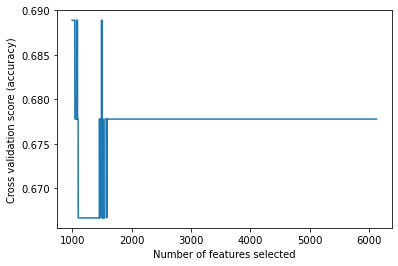

In [44]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [41]:
len(rfecv.grid_scores_)

5124

In [44]:
rfecv_Y = rfecv.predict(X_test)

In [45]:
rfecv_acc = accuracy_score(Y_test, rfecv_Y)
rfecv_acc

0.6956521739130435

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
lr = LogisticRegression(random_state=20)
lr.fit(X_train,Y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

In [37]:
lr_Y = lr.predict(X_test)

In [38]:
lr_acc = accuracy_score(Y_test, lr_Y)
lr_acc

0.7391304347826086

In [39]:
lr_cm = confusion_matrix(Y_test, lr_Y)
lr_cm

array([[5, 0, 0, 0],
       [0, 4, 3, 0],
       [0, 1, 2, 1],
       [0, 0, 1, 6]])

In [41]:
print(classification_report(Y_test, lr_Y))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      0.57      0.67         7
           3       0.33      0.50      0.40         4
           4       0.86      0.86      0.86         7

    accuracy                           0.74        23
   macro avg       0.75      0.73      0.73        23
weighted avg       0.78      0.74      0.75        23



In [44]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [45]:
rf_Y = rf.predict(X_test)

In [46]:
rf_acc = accuracy_score(Y_test, rf_Y)
rf_acc

0.34782608695652173

In [47]:
rf_cm = confusion_matrix(Y_test, rf_Y)
rf_cm

array([[3, 1, 0, 1],
       [1, 2, 2, 2],
       [0, 2, 0, 2],
       [2, 0, 2, 3]])

In [53]:
print(classification_report(Y_test, rf_Y))

              precision    recall  f1-score   support

           1       0.50      0.60      0.55         5
           2       0.40      0.29      0.33         7
           3       0.00      0.00      0.00         4
           4       0.38      0.43      0.40         7

    accuracy                           0.35        23
   macro avg       0.32      0.33      0.32        23
weighted avg       0.34      0.35      0.34        23



In [68]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Mean Accuracy: 0.793 (0.110)


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [70]:
y_pred = classifier.predict(X_test)

In [71]:
rf_acc = accuracy_score(Y_test, y_pred)
rf_acc

0.43478260869565216